In [1]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

#import pandas_profiling
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sb
from nltk.corpus import stopwords
import warnings 
warnings.filterwarnings("ignore")
import unidecode
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
import matplotlib.animation as animation
import operator
import plotly.express as px
from collections import Counter
import re
%matplotlib inline
from CleaningClass import dfCleaning

[nltk_data] Downloading package wordnet to /Users/Merlin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Merlin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Set-ups to Connect to MongoDB

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

['config.ini']

In [3]:
mongod_connect = config['mymongo']['connection']

In [4]:
client = MongoClient(mongod_connect)

In [5]:
db = client.test

## Get the data

### SouthEast Asia

In [6]:
HKCollection = db.newHongKong

In [7]:
HKdata = pd.DataFrame(list(HKCollection.find()))

In [8]:
HKdata.columns

Index(['_id', 'created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'lang', 'extended_entities'],
      dtype='object')

### Europe

In [9]:
EUCollection = db.newEU

In [10]:
EUdata = pd.DataFrame(list(EUCollection.find()))

In [11]:
len(EUdata.columns)

30

## Data Cleaning

#### EU cleaned

In [12]:
EUtweets = EUdata[['text','retweet_count','favorite_count']]

In [13]:
EUCleaned = dfCleaning(EUtweets)

[nltk_data] Downloading package wordnet to /Users/Merlin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Merlin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
EUCleaned.head(6)

,text,retweet_count,favorite_count,clean_tweet,Hash words
0,Nothing to do w/current subject but my pet hat...,0,0,"noth w/current subject pet hate, 1 many, ppl i...",No hashtags
1,@raumsonde543 @CNN https://t.co/hdz1xrANAw\nht...,0,0,,No hashtags
2,"@Brehbander Nee, dat valt best mee. Want juist...",0,1,"nee, dat valt best mee. want juist die casusse...",No hashtags
3,@hqt__ @hack___man @blackvoices It is sensatio...,0,0,it sensat sinc deni everi day. white hate crim...,No hashtags
4,@DannyHackett @bexleynews Hate is a crime now.,0,0,hate crime now.,No hashtags
5,@aisssssse ce fut un hate crime ducoup 😢😢 mais...,0,1,ce fut un hate crime ducoup mai au moin notr r...,No hashtags


EUcorpus

#### HK cleaned

In [15]:
HKtweets = HKdata[['text','retweet_count','favorite_count']]

In [16]:
HKCleaned = dfCleaning(HKtweets)

[nltk_data] Downloading package wordnet to /Users/Merlin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Merlin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
HKCleaned.head(6)

,text,retweet_count,favorite_count,clean_tweet,Hash words
0,Whole muslim world follow these protocols exce...,0,1,whole muslim world follow protocol except unfo...,No hashtags
1,American actor Jussie Smollett guilty of false...,0,0,american actor jussi smollett guilti fals hate...,No hashtags
2,Jussie Smollett Found Guilty Of Staging Fake H...,0,0,jussi smollett found guilti of stage fake hate...,No hashtags
3,Jussie Smollett Found Guilty Of Staging Fake H...,0,0,jussi smollett found guilti of stage fake hate...,No hashtags
4,US actor found guilty in staged racist hate cr...,1,3,us actor found guilti stage racist hate crime ...,No hashtags
5,Actor Jussie Smollett found guilty of staging ...,5,11,actor jussi smollett found guilti stage fake h...,No hashtags


## Word clouds

In [18]:

    
def my_tf_color_func(dictionary):
  def my_tf_color_func_inner(word, **kwargs):
    return "hsl(%d, 80%%, 50%%)" % (360 * dictionary[word])
  return my_tf_color_func_inner

Normal words


(-0.5, 799.5, 499.5, -0.5)

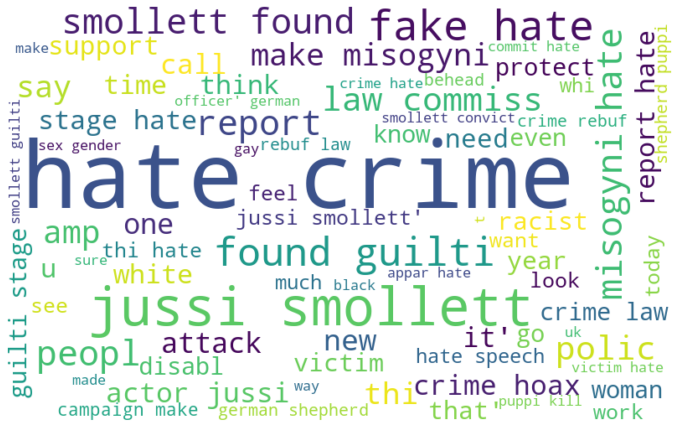

In [19]:
normal_words = ' '.join([word for word in EUCleaned['clean_tweet']])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 75,background_color = "white").generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

Normal words


(-0.5, 799.5, 499.5, -0.5)

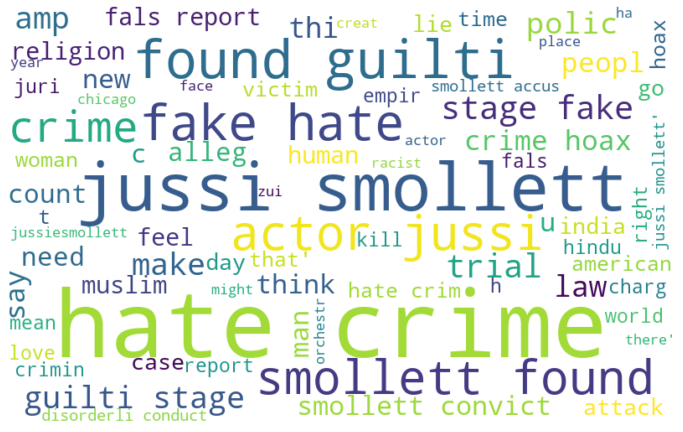

In [20]:
normal_words = ' '.join([word for word in HKCleaned['clean_tweet']])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 75,background_color = "white").generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

## Vader sentiment analysis package

In [21]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [22]:
sia = SentimentIntensityAnalyzer()

### Adding Scores and Labels to the DataFrame
#### The SentimentIntensityAnalyzer() will return a dictionaries with compound scores and negtive/neutrual/positive labels

In [31]:
EUCleaned['scores'] = EUCleaned['clean_tweet'].apply(lambda text: sia.polarity_scores(text))

In [32]:
EUCleaned.head(3)

,text,retweet_count,favorite_count,clean_tweet,Hash words,scores
0,Nothing to do w/current subject but my pet hat...,0,0,"noth w/current subject pet hate, 1 many, ppl i...",No hashtags,"{'neg': 0.291, 'neu': 0.709, 'pos': 0.0, 'comp..."
1,@raumsonde543 @CNN https://t.co/hdz1xrANAw\nht...,0,0,,No hashtags,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
2,"@Brehbander Nee, dat valt best mee. Want juist...",0,1,"nee, dat valt best mee. want juist die casusse...",No hashtags,"{'neg': 0.525, 'neu': 0.307, 'pos': 0.169, 'co..."


#### separate compound to it's own column. Tweets that have compound scores greater than zeroes will be considered a 'positive' tweets. 'negative' if compound scores lower than zero

In [33]:
EUCleaned['compound'] = EUCleaned['scores'].apply(lambda score_dict: score_dict['compound'])

In [34]:
EUCleaned['comp_score'] = EUCleaned['compound'].apply(lambda c: 'pos' if c >0.1 else ('neg' if c < -0.1 else 'nutral'))

In [35]:
EUCleaned.sort_values(['favorite_count', 'compound'],ascending = False)

,text,retweet_count,favorite_count,clean_tweet,Hash words,scores,compound,comp_score
747,Breaking: Jussie Smollett has been found guilt...,1442,6981,breaking: jussi smollett found guilti 5 6 coun...,No hashtags,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,nutral
1077,"During the criminal trial for Jussie Smollett,...",794,2584,"dure crimin trial jussi smollett, testifi rece...",No hashtags,"{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...",0.4939,pos
54,Flashback: Shorty after Jussie Smollett commit...,476,1988,flashback: shorti jussi smollett commit hate c...,No hashtags,"{'neg': 0.476, 'neu': 0.325, 'pos': 0.199, 'co...",-0.7783,neg
2097,The @NYPDHateCrimes unit is investigating an a...,793,1814,the unit investig antisemit hate crime occur 1...,No hashtags,"{'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'comp...",-0.8020,neg
2339,Update: The black male suspect in the anti-Asi...,231,1583,update: the black male suspect anti-asian atta...,No hashtags,"{'neg': 0.306, 'neu': 0.694, 'pos': 0.0, 'comp...",-0.6486,neg
...,...,...,...,...,...,...,...,...
1824,I’m a victim of hate crime due to my mental he...,0,0,i'm victim hate crime due mental health disabi...,No hashtags,"{'neg': 0.672, 'neu': 0.244, 'pos': 0.084, 'co...",-0.9509,neg
664,Faking a hate crime is a hate crime.,0,0,fake hate crime hate crime.,No hashtags,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",-0.9552,neg
1612,the thing is when people dismiss at 82-year-ol...,0,0,"thing peopl dismiss 82-year-old murder ""murder...",No hashtags,"{'neg': 0.703, 'neu': 0.297, 'pos': 0.0, 'comp...",-0.9559,neg
2136,"@dearaunty But “if a crime is recorded, but no...",0,0,"but ""if crime recorded, identifi hate crime, v...",No hashtags,"{'neg': 0.711, 'neu': 0.289, 'pos': 0.0, 'comp...",-0.9595,neg


## EDA

In [28]:
import seaborn as sns

[Text(0.5, 0, 'HK Result')]

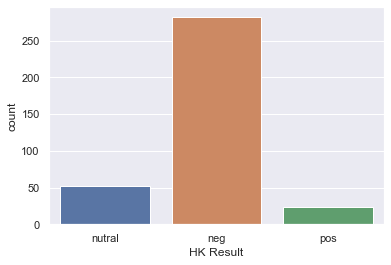

In [29]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="comp_score", data=HKCleaned)
ax.set(xlabel='HK Result')

[Text(0.5, 0, 'EU Result')]

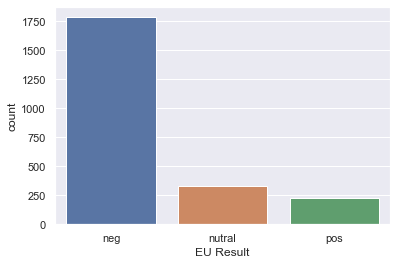

In [36]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="comp_score", data=EUCleaned)
ax.set(xlabel='EU Result')

In [37]:
EUCleaned.to_csv('EUCleaned.csv',index = False)

In [38]:
HKCleaned.to_csv('HKCleaned.csv',index = False)